<a href="https://colab.research.google.com/github/cavendano01/DS1-Python/blob/main/02_ML_Modelos%20de%20Regresi%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Predicción de ventas: Predicción de las ventas de una cadena de tiendas importante, Rossmann**

#Flujo de trabajo de Aprendizaje de Máquina

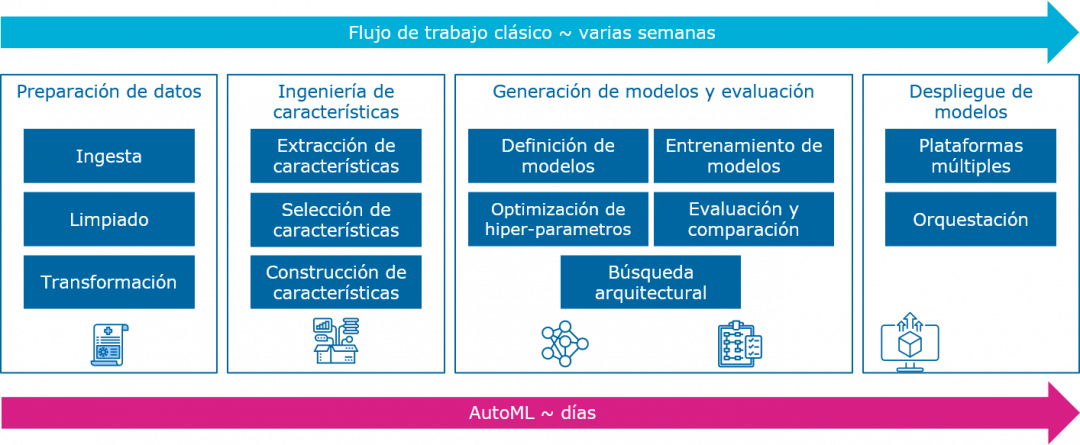

# Descripción del Problema

Rossmann opera más de 3,000 tiendas de medicamentos en 7 países europeos.
Actualmente, los gerentes de las tiendas Rossmann tienen la tarea de predecir sus ventas diarias hasta con seis semanas de anticipación. Las ventas de las tiendas se ven influenciadas por muchos factores, incluyendo promociones, competencia, días festivos escolares y estatales, estacionalidad y localidad. Con miles de gerentes individuales prediciendo las ventas basándose en sus circunstancias únicas, la precisión de los resultados puede variar considerablemente.
Se proporcionan datos históricos de ventas para 1,115 tiendas Rossmann.

La tarea consiste en pronosticar la columna "Sales" para el conjunto de prueba. Tenga en cuenta que algunas tiendas en el conjunto de datos estuvieron temporalmente cerradas por renovación.

## Descripción de los Datos

Rossmann Stores Data.csv -
store.csv -
Data Fields

* Id: un ID que representa una combinación (Tienda, Fecha) dentro del conjunto de prueba.

* Store: un ID único para cada tienda.

* Sales: el volumen de ventas para un día determinado (esto es lo que se está pronosticando).

* Customers: el número de clientes en un día determinado.

* Open: un indicador de si la tienda estaba abierta:
> * 0 = cerrada,
> * 1 = abierta.

* StateHoliday: indica un día festivo estatal. Normalmente, todas las tiendas, con pocas excepciones, están cerradas en días festivos estatales. Tenga en cuenta que todas las escuelas están cerradas en días festivos públicos y fines de semana.
> * a = día festivo,
> * b = día festivo de Pascua,
> * c = Navidad,
> * 0 = ninguno.

* SchoolHoliday: indica si (Tienda, Fecha) se vio afectado por el cierre de las escuelas públicas.

* StoreType: diferencia entre 4 modelos de tiendas diferentes: a, b, c, d.

* Assortment: describe un nivel de surtido:
> * a = básico,
> * b = extra,
> * c = extendido.

* CompetitionDistance: distancia en metros a la tienda de competencia más cercana.

* CompetitionOpenSince[Month/Year]: indica el año y mes aproximado en que se abrió la competencia más cercana.

* Promo: indica si una tienda está realizando una promoción ese día.

* Promo2: Promo2 es una promoción continua y consecutiva para algunas tiendas:
> * 0 = la tienda no está participando,
> * 1 = la tienda está participando.

* Promo2Since[Year/Week]: describe el año y la semana del calendario en que la tienda comenzó a participar en Promo2.

* PromoInterval: describe los intervalos consecutivos en los que se inicia Promo2, nombrando los meses en los que la promoción se inicia de nuevo. Por ejemplo, "Feb,May,Aug,Nov" significa que cada ronda comienza en febrero, mayo, agosto y noviembre de cualquier año dado para esa tienda.


# Librerías y Datos



## Procesamiento de Datos

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
import datetime # Split de Fechas en Dia, año, etc
import missingno as msno
import matplotlib
import matplotlib.pylab as pylab

In [5]:
%matplotlib inline
matplotlib.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize'] = 8,6


## Algebra lineal

In [6]:
import math
import statsmodels.api as sm

## Modelos de Regresión

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from math import sqrt

In [8]:
from sklearn.linear_model import BayesianRidge #NO
from sklearn.linear_model import LassoLars
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor #NO

## Medición de Efectividad del modelo

In [9]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import ElasticNet

## Cargar Datos

In [10]:
# Data Reading
sales_df = pd.read_csv('https://raw.githubusercontent.com/RPI-DATA/tutorials-intro/master/rossmann-store-sales/rossmann-store-sales/train.csv',  low_memory = False)
store_df = pd.read_csv('https://raw.githubusercontent.com/RPI-DATA/tutorials-intro/master/rossmann-store-sales/rossmann-store-sales/store.csv', low_memory = False)

# Análisis Exploratorio de Sales_df

In [12]:
sales_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [14]:
sales_df.tail(10)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
1017199,1106,2,2013-01-01,0,0,0,0,a,1
1017200,1107,2,2013-01-01,0,0,0,0,a,1
1017201,1108,2,2013-01-01,0,0,0,0,a,1
1017202,1109,2,2013-01-01,0,0,0,0,a,1
1017203,1110,2,2013-01-01,0,0,0,0,a,1
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1
1017208,1115,2,2013-01-01,0,0,0,0,a,1


In [15]:
sales_df.shape

(1017209, 9)

In [17]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [18]:
sales_df.StateHoliday


0          0
1          0
2          0
3          0
4          0
          ..
1017204    a
1017205    a
1017206    a
1017207    a
1017208    a
Name: StateHoliday, Length: 1017209, dtype: object

In [20]:
sales_df.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


In [22]:
#No. Of Stores in the Dataset
sales_df.Store.nunique()

1115

In [23]:
# Value_counts of StateHoliday Column
sales_df.StateHoliday.value_counts()

0    986159
a     20260
b      6690
c      4100
Name: StateHoliday, dtype: int64

In [27]:
tes_df = sales_df.copy()
tes_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [39]:
sales_df['StateHoliday'].replace(['a','b','c'],[1,2,3], inplace=True)

In [40]:
sales_df.StateHoliday.value_counts()

0    986159
1     20260
2      6690
3      4100
Name: StateHoliday, dtype: int64

In [43]:
sales_df.dtypes

Store             int64
DayOfWeek         int64
Date             object
Sales             int64
Customers         int64
Open              int64
Promo             int64
StateHoliday     object
SchoolHoliday     int64
dtype: object

In [46]:
sales_df['StateHoliday'] = sales_df['StateHoliday'].astype(np.int64)
sales_df.dtypes

Store             int64
DayOfWeek         int64
Date             object
Sales             int64
Customers         int64
Open              int64
Promo             int64
StateHoliday      int64
SchoolHoliday     int64
dtype: object

In [25]:
print(sales_df['Date'].min(),'initial')
print(sales_df['Date'].max(),'final')

2013-01-01 initial
2015-07-31 final


## Expandiendo dimensión de fechas

In [47]:
sales_df['Date'] = pd.to_datetime(sales_df['Date'])

In [48]:
sales_df.dtypes

Store                     int64
DayOfWeek                 int64
Date             datetime64[ns]
Sales                     int64
Customers                 int64
Open                      int64
Promo                     int64
StateHoliday              int64
SchoolHoliday             int64
dtype: object

In [49]:
# extract year, month, day and week of year from "Date"

sales_df['Year'] = sales_df['Date'].apply(lambda x: x.year)
sales_df['Month'] = sales_df['Date'].apply(lambda x: x.month)
sales_df['Day'] = sales_df['Date'].apply(lambda x: x.day)
sales_df['WeekOfYear'] = sales_df['Date'].apply(lambda x: x.weekofyear)

In [50]:
sales_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,WeekOfYear
0,1,5,2015-07-31,5263,555,1,1,0,1,2015,7,31,31
1,2,5,2015-07-31,6064,625,1,1,0,1,2015,7,31,31
2,3,5,2015-07-31,8314,821,1,1,0,1,2015,7,31,31
3,4,5,2015-07-31,13995,1498,1,1,0,1,2015,7,31,31
4,5,5,2015-07-31,4822,559,1,1,0,1,2015,7,31,31


In [51]:
sales_df.dtypes

Store                     int64
DayOfWeek                 int64
Date             datetime64[ns]
Sales                     int64
Customers                 int64
Open                      int64
Promo                     int64
StateHoliday              int64
SchoolHoliday             int64
Year                      int64
Month                     int64
Day                       int64
WeekOfYear                int64
dtype: object

In [52]:
sales_df.sort_values(by=['Date','Store'],inplace=True,ascending=[False,True])
sales_df.head(2)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,WeekOfYear
0,1,5,2015-07-31,5263,555,1,1,0,1,2015,7,31,31
1,2,5,2015-07-31,6064,625,1,1,0,1,2015,7,31,31


## Análisis de Correlación

<ipython-input-53-a9ba4ee7924e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_map = sales_df[sales_df.columns].corr()


<Axes: >

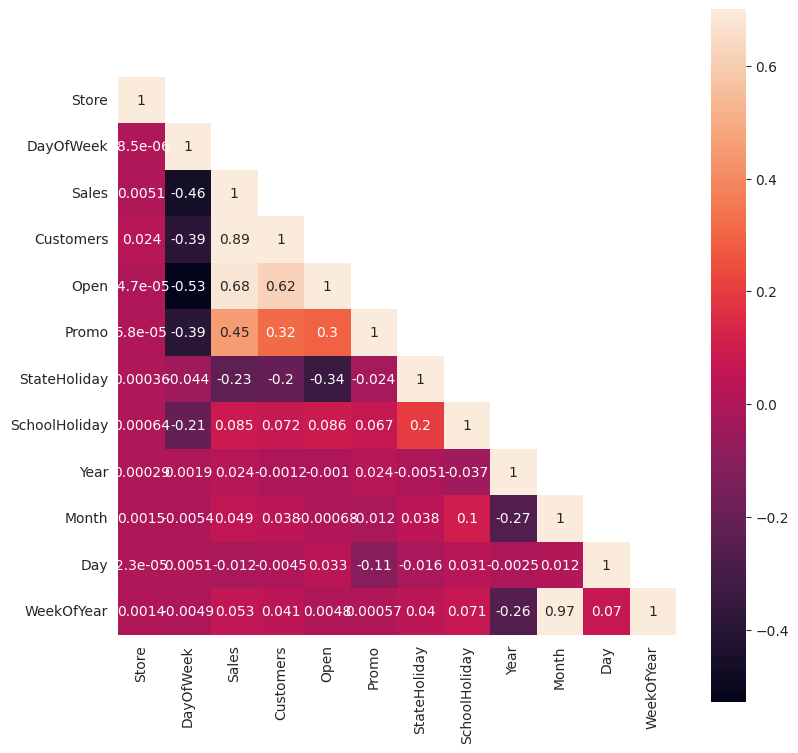

In [53]:
correlation_map = sales_df[sales_df.columns].corr()
obj = np.array(correlation_map)
obj[np.tril_indices_from(obj)] = False
fig,ax= plt.subplots()
fig.set_size_inches(9,9)
sns.heatmap(correlation_map, mask=obj,vmax=.7, square=True,annot=True)

### Días abierto

<Axes: xlabel='DayOfWeek', ylabel='count'>

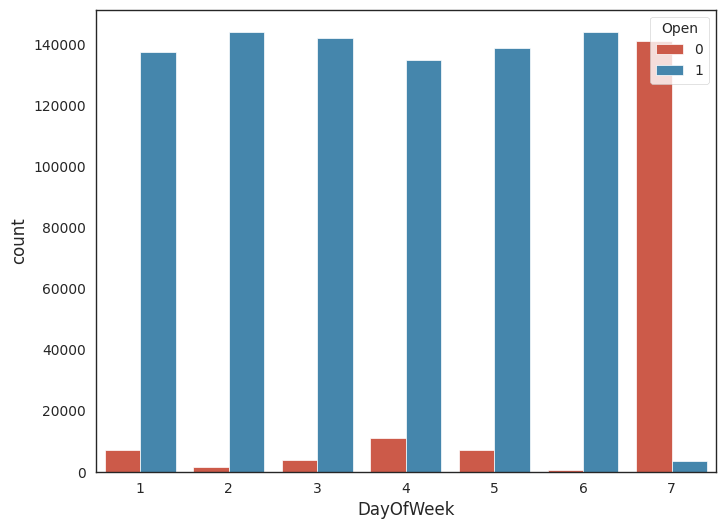

In [54]:
sns.countplot(x='DayOfWeek',hue='Open',data=sales_df)

## Impacto de Promos

<Axes: xlabel='Promo', ylabel='Sales'>

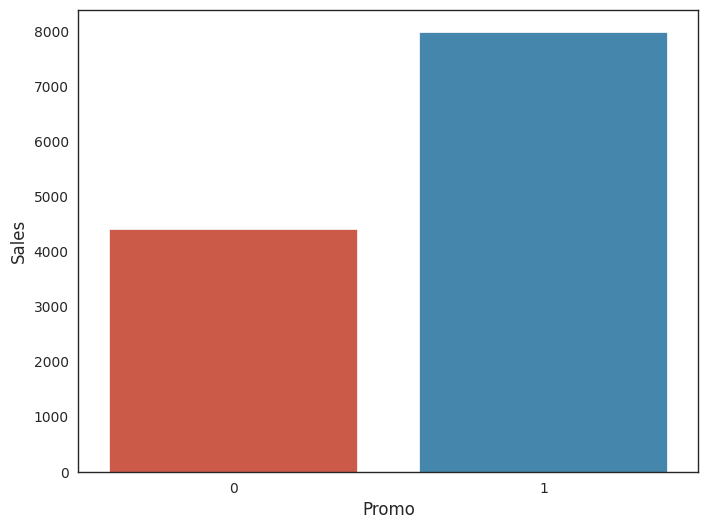

In [55]:
#Impact of promo on sales
Promo_sales = pd.DataFrame(sales_df.groupby('Promo').agg({'Sales':'mean'}))
sns.barplot(x=Promo_sales.index, y = Promo_sales['Sales'])

## Seasonality

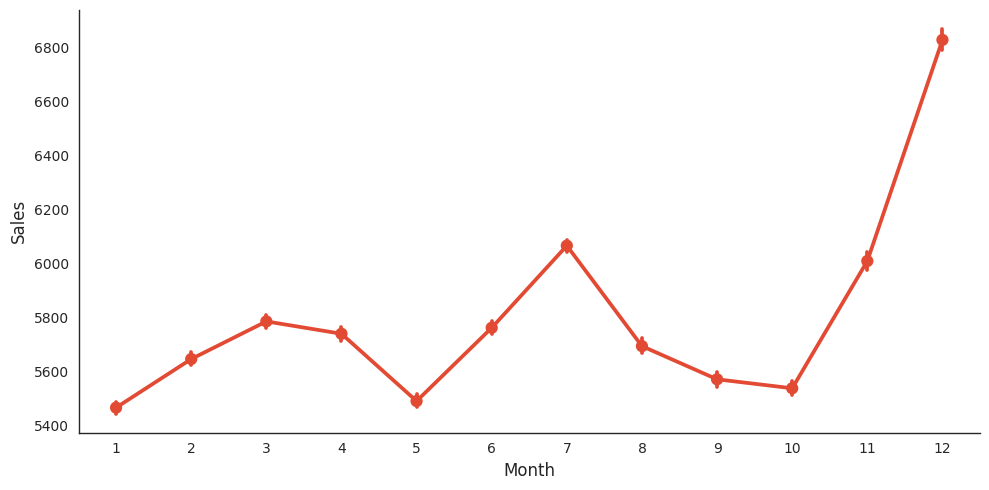

In [56]:
sns.catplot(x="Month" ,y = "Sales" , data=sales_df, kind="point", aspect=2)

## Sales v Costumers

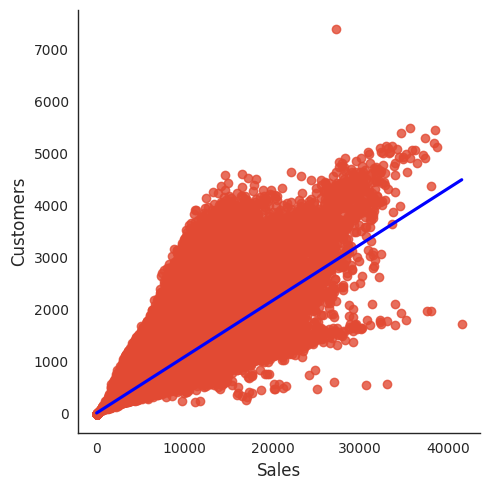

In [57]:
#linear relation between sales and customers
sns.lmplot(x= 'Sales' , y ='Customers',data=sales_df, palette='seismic', height=5,aspect=1, line_kws={'color':'blue'});

# Análisis exploratorio de stores_df

In [58]:
store_df.head(5)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [59]:
store_df.tail()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN
1114,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"


In [60]:
store_df.shape

(1115, 10)

In [63]:
store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


## Verificando Valores Nulos

In [64]:
store_df.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

<Axes: >

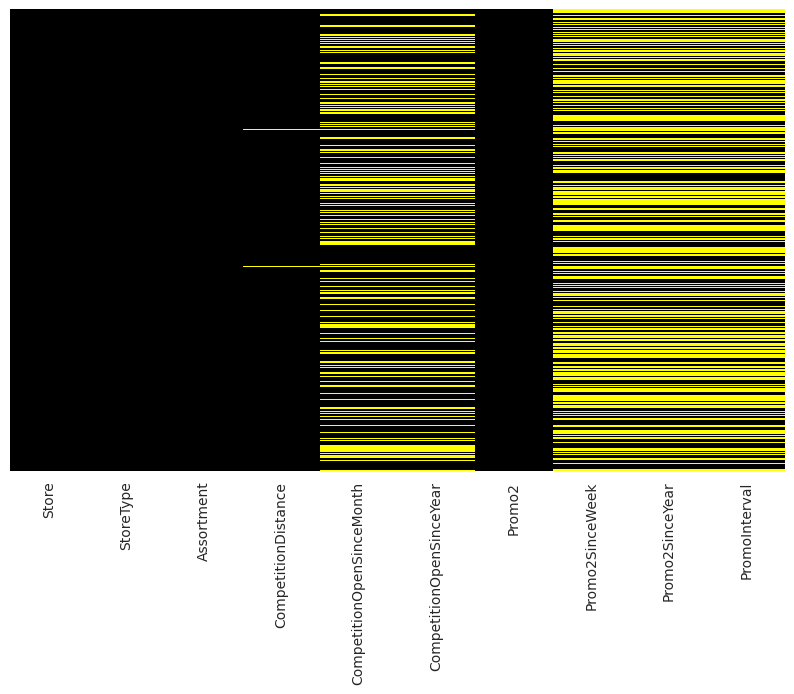

In [65]:
# creating heatmap for null values
plt.figure(figsize=(10,6))
sns.heatmap(store_df.isnull(),yticklabels= False, cbar= False, cmap= 'gnuplot')

## Tipos de Tiendas

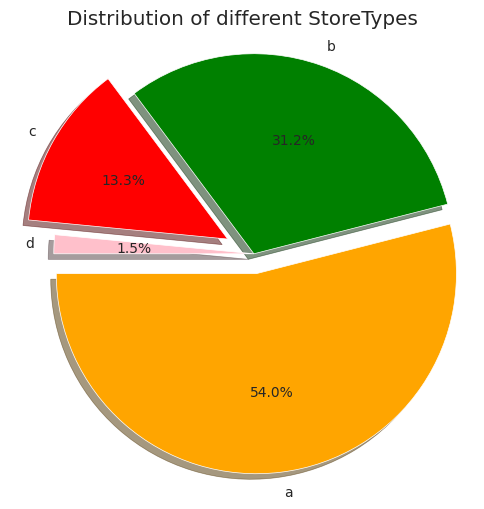

In [66]:
labels = 'a' , 'b' , 'c' , 'd'
sizes = store_df.StoreType.value_counts()
colors = ['orange', 'green' , 'red' , 'pink']
explode = (0.1, 0.0 , 0.15 , 0.0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=180)
plt.axis('equal')
plt.title("Distribution of different StoreTypes")
plt.plot()
fig=plt.gcf()
fig.set_size_inches(6,6)
plt.show()

## Limpieza de Features

we can see that some features have a high percentage of missing values and they won't be accurate as indicators, so we will remove features with more than 30% missing values.

In [67]:
store_df.columns

Index(['Store', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

## Imputando valores faltantes

<ipython-input-68-a8e30cb2c49f>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(store_df.CompetitionDistance.dropna())


Text(0.5, 1.0, 'Distributin of Store Competition Distance')

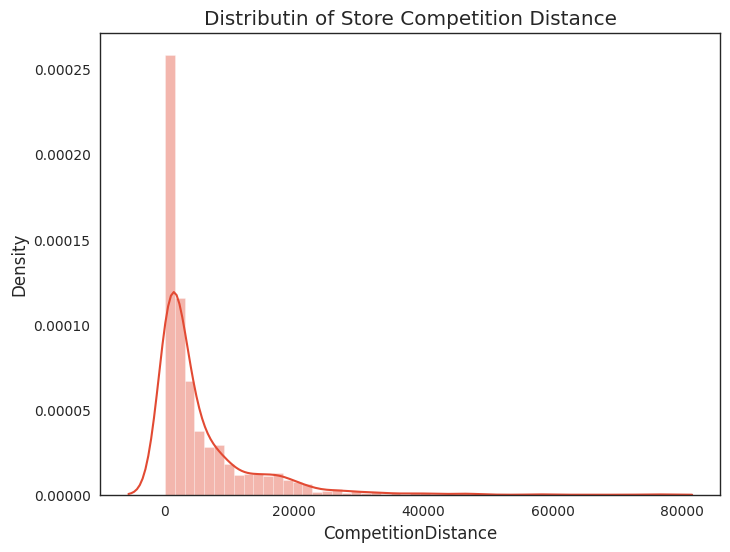

In [68]:
# CompetitionDistance is distance in meters to the nearest competitor store
# let's first have a look at its distribution

sns.distplot(store_df.CompetitionDistance.dropna())
plt.title("Distributin of Store Competition Distance")

The distribution is right skewed, so we'll replace missing values with the median.

In [69]:
store_df.CompetitionDistance.fillna(store_df.CompetitionDistance.median(), inplace=True)


## Exploración visual

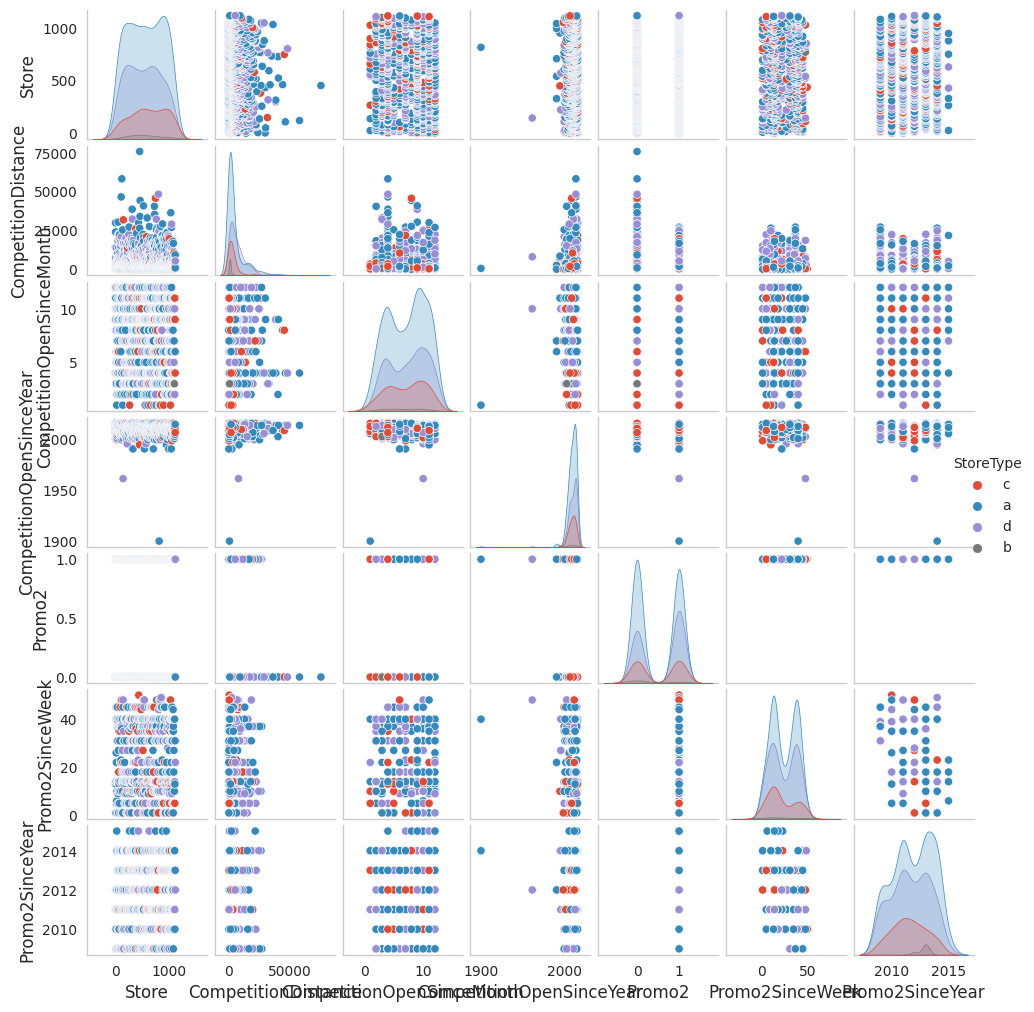

In [70]:
#pairplot for store dataset
sns.set_style("whitegrid", {'axes.grid' : False})
pp=sns.pairplot(store_df,hue='StoreType')
pp.fig.set_size_inches(10,10);

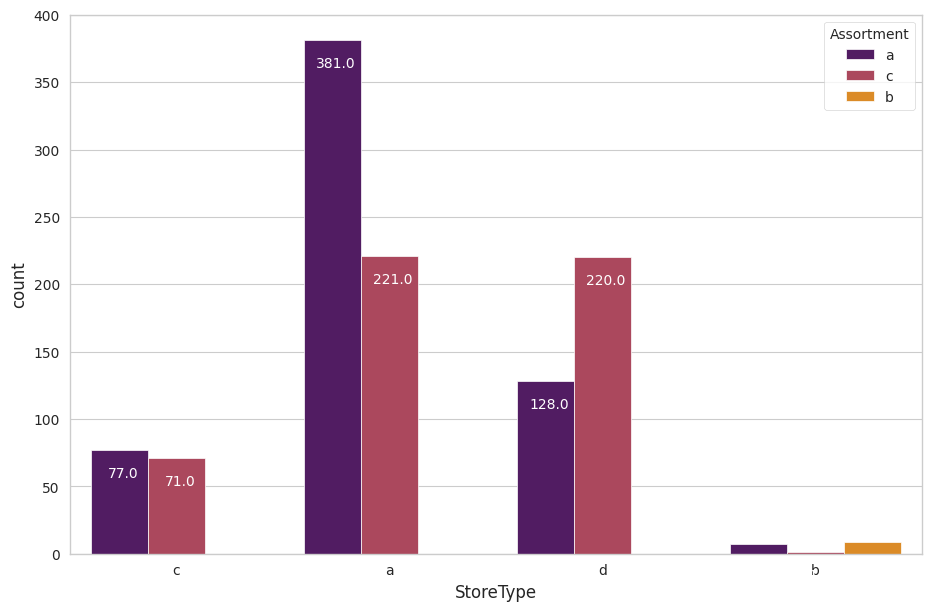

In [71]:

#checking stores with their assortment type
sns.set_style("whitegrid")
fig, ax = plt.subplots()
fig.set_size_inches(11, 7)
store_type=sns.countplot(x='StoreType',hue='Assortment', data=store_df,palette="inferno")

for p in store_type.patches:
    store_type.annotate(f'\n{p.get_height()}', (p.get_x()+0.15, p.get_height()),ha='center', va='top', color='white', size=10)

In [72]:
store_df.columns

Index(['Store', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

In [ ]:
#plotting year vs sales
sns.catplot(x='Year',y='Sales',data=sales_df, height=4, aspect=4 );

# Uniendo los Dataset

In [73]:
df = pd.merge(sales_df, store_df, how='left', on='Store')
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,...,WeekOfYear,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,2015,...,31,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,2015,...,31,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,2015,...,31,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,2015,...,31,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,2015,...,31,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


## Matriz de Correlación

<ipython-input-74-c9365ccba2f6>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr().abs(), annot=True)


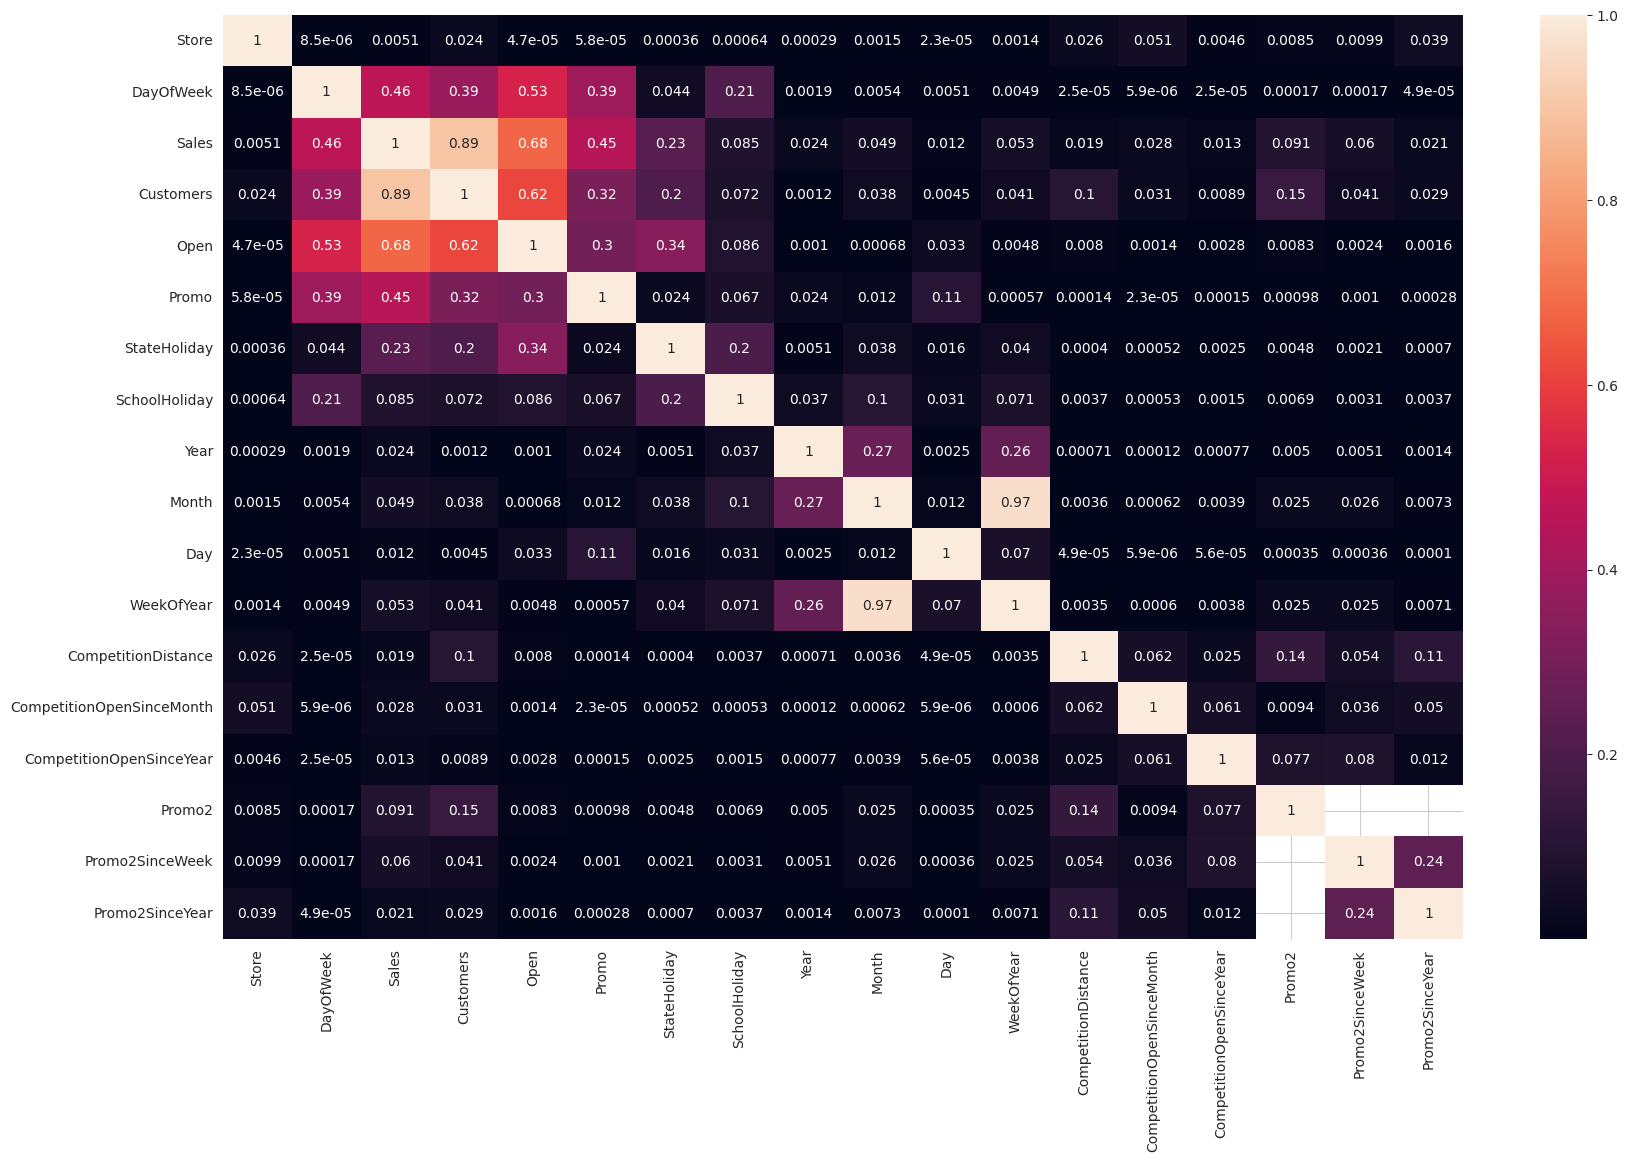

In [74]:
plt.subplots(figsize=(20,12))
sns.heatmap(df.corr().abs(), annot=True)
plt.savefig("heatmap.png")

## Calculo especial

In [75]:
df["Avg_Customer_Sales"] = df.Sales/df.Customers

## Exploración visual de "Fuerza Bruta"

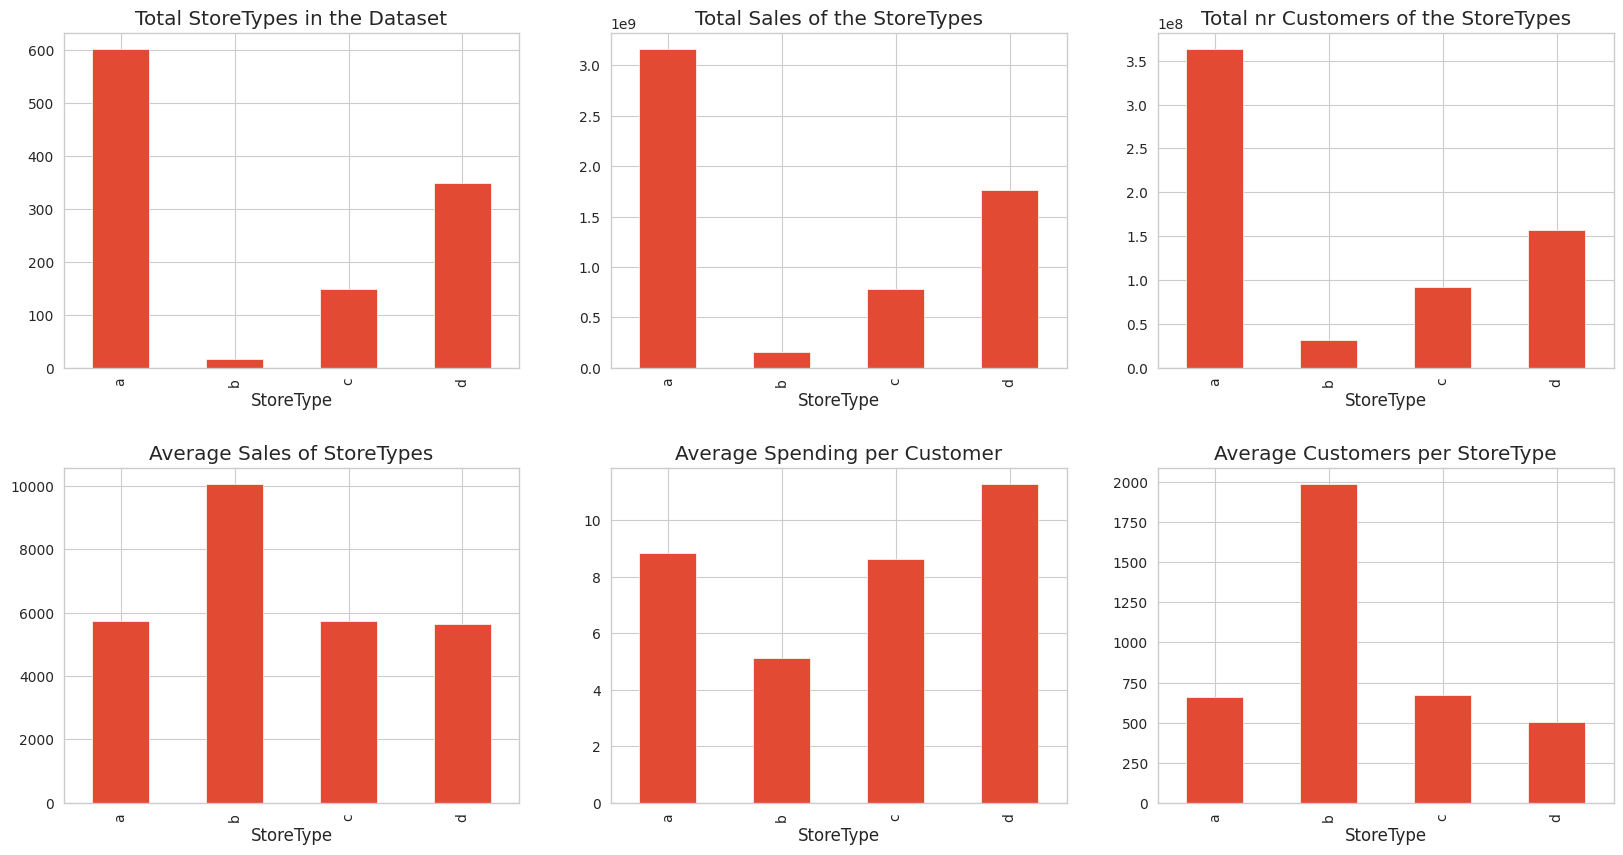

In [76]:
f, ax = plt.subplots(2, 3, figsize = (20,10))

store_df.groupby("StoreType")["Store"].count().plot(kind = "bar", ax = ax[0, 0], title = "Total StoreTypes in the Dataset")
df.groupby("StoreType")["Sales"].sum().plot(kind = "bar", ax = ax[0,1], title = "Total Sales of the StoreTypes")
df.groupby("StoreType")["Customers"].sum().plot(kind = "bar", ax = ax[0,2], title = "Total nr Customers of the StoreTypes")
df.groupby("StoreType")["Sales"].mean().plot(kind = "bar", ax = ax[1,0], title = "Average Sales of StoreTypes")
df.groupby("StoreType")["Avg_Customer_Sales"].mean().plot(kind = "bar", ax = ax[1,1], title = "Average Spending per Customer")
df.groupby("StoreType")["Customers"].mean().plot(kind = "bar", ax = ax[1,2], title = "Average Customers per StoreType")

plt.subplots_adjust(hspace = 0.3)
plt.show()

In [ ]:
sns.catplot(data = df, x ="Month", y = "Sales",
               col = 'Promo', # per store type in cols
               hue = 'Promo2',
               row = "Year"
             )

In [ ]:
sns.catplot(data = df, x = "DayOfWeek", y = "Sales", hue = "Promo")

In [ ]:
sns.catplot(data = df, x = "Month", y = "Sales", col = "Year", hue = "StoreType")

# Conclusiones de Exploración

Resumen:

- Eliminar Domingos
- Sales Outliers
- Eliminar Valores Nulos
- Tipos de Tiendas

**# Modelos de Regresión**

# Preparación final de datos para ML

## Verificar Outliers en variable Y a predecir

<Axes: >

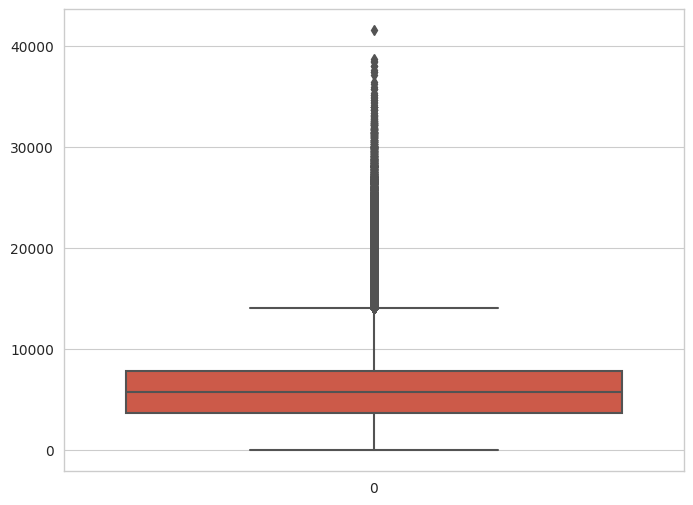

In [78]:
sns.boxplot(df['Sales'])

In [80]:
#removing outliers
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

## Remover datos que pueden causar sesgo

Remover días con tiendass cerradas

In [81]:
df = df[df.Open !=0]

Remover Variable innecesaria

In [82]:
df = df.drop('Open', axis=1)

Verificar tiendas sin ventas

In [83]:
df[df.Sales == 0]['Store'].sum()

31460

In [84]:
df = df[df.Sales !=0]

# Selección de Features/Características y Split

Una característica (Feature) es una propiedad o característica medible individual de un fenómeno. Elegir características informativas, discriminantes e independientes es un elemento crucial de los algoritmos efectivos en el reconocimiento de patrones, clasificación y regresión. Las características suelen ser numéricas, pero también se utilizan características estructurales como cadenas y grafos en el reconocimiento de patrones sintácticos. El concepto de "característica" está relacionado con el de variable explicativa utilizado en técnicas estadísticas como la regresión lineal.

**Tipos de características**

- Las características numéricas son valores continuos que se pueden medir en una escala. Ejemplos de características numéricas incluyen edad, altura, peso e ingresos. Las características numéricas se pueden utilizar directamente en algoritmos de aprendizaje automático.

- Las características categóricas son valores discretos que se pueden agrupar en categorías. Ejemplos de características categóricas incluyen género, color y código postal. Por lo general, las características categóricas deben convertirse en características numéricas antes de poder ser utilizadas en algoritmos de aprendizaje automático. Esto se puede hacer utilizando diversas técnicas, como la codificación one-hot, la codificación de etiquetas y la codificación ordinal.

El tipo de característica que se utiliza en la ingeniería de características depende del algoritmo de aprendizaje automático específico que se esté utilizando. Algunos algoritmos de aprendizaje automático, como los árboles de decisión, pueden manejar tanto características numéricas como categóricas. Otros algoritmos de aprendizaje automático, como la regresión lineal, solo pueden manejar características numéricas.

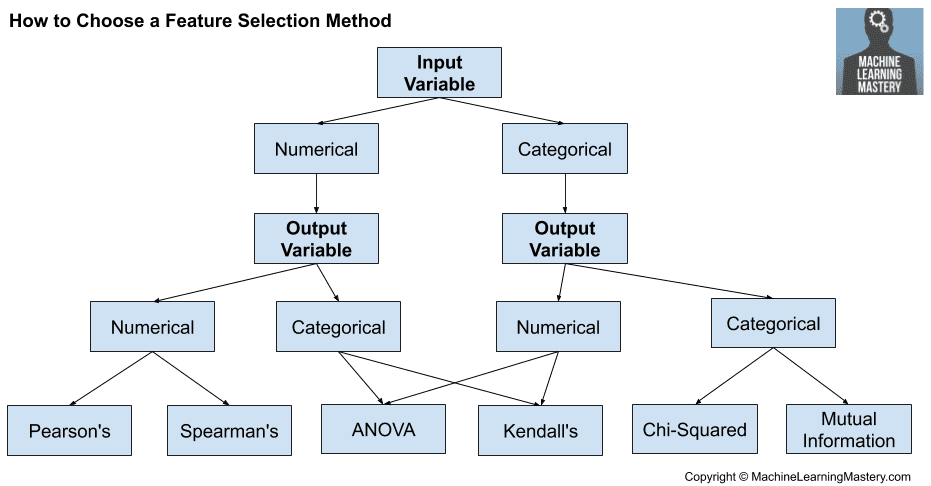

In [85]:
data = df.copy()

In [86]:
data.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'Year', 'Month', 'Day', 'WeekOfYear',
       'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval',
       'Avg_Customer_Sales'],
      dtype='object')

### Variables Dummy


Como sabemos, en el Modelo de Regresión Múltiple utilizamos muchos datos categóricos. El uso de datos categóricos es un buen método para incluir datos no numéricos en el modelo de regresión correspondiente. Los datos categóricos se refieren a valores de datos que representan categorías, es decir, valores de datos con un número fijo y no ordenado de valores, por ejemplo, género (masculino/femenino). En el modelo de regresión, estos valores se pueden representar mediante variables dummy.

Estas variables consisten en valores como 0 o 1 que representan la presencia y ausencia de valores categóricos.

In [87]:
data = pd.get_dummies(data,columns=['StoreType', 'Assortment'])

In [88]:
data.head()

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,Year,Month,...,Promo2SinceYear,PromoInterval,Avg_Customer_Sales,StoreType_a,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c
0,1,5,2015-07-31,5263,555,1,0,1,2015,7,...,NaN,NaN,9.482883,0,0,1,0,1,0,0
1,2,5,2015-07-31,6064,625,1,0,1,2015,7,...,2010.0,"Jan,Apr,Jul,Oct",9.702400,1,0,0,0,1,0,0
2,3,5,2015-07-31,8314,821,1,0,1,2015,7,...,2011.0,"Jan,Apr,Jul,Oct",10.126675,1,0,0,0,1,0,0
3,4,5,2015-07-31,13995,1498,1,0,1,2015,7,...,NaN,NaN,9.342457,0,0,1,0,0,0,1
4,5,5,2015-07-31,4822,559,1,0,1,2015,7,...,NaN,NaN,8.626118,1,0,0,0,1,0,0


In [89]:
data.dtypes

Store                                 int64
DayOfWeek                             int64
Date                         datetime64[ns]
Sales                                 int64
Customers                             int64
Promo                                 int64
StateHoliday                          int64
SchoolHoliday                         int64
Year                                  int64
Month                                 int64
Day                                   int64
WeekOfYear                            int64
CompetitionDistance                 float64
CompetitionOpenSinceMonth           float64
CompetitionOpenSinceYear            float64
Promo2                                int64
Promo2SinceWeek                     float64
Promo2SinceYear                     float64
PromoInterval                        object
Avg_Customer_Sales                  float64
StoreType_a                           uint8
StoreType_b                           uint8
StoreType_c                     

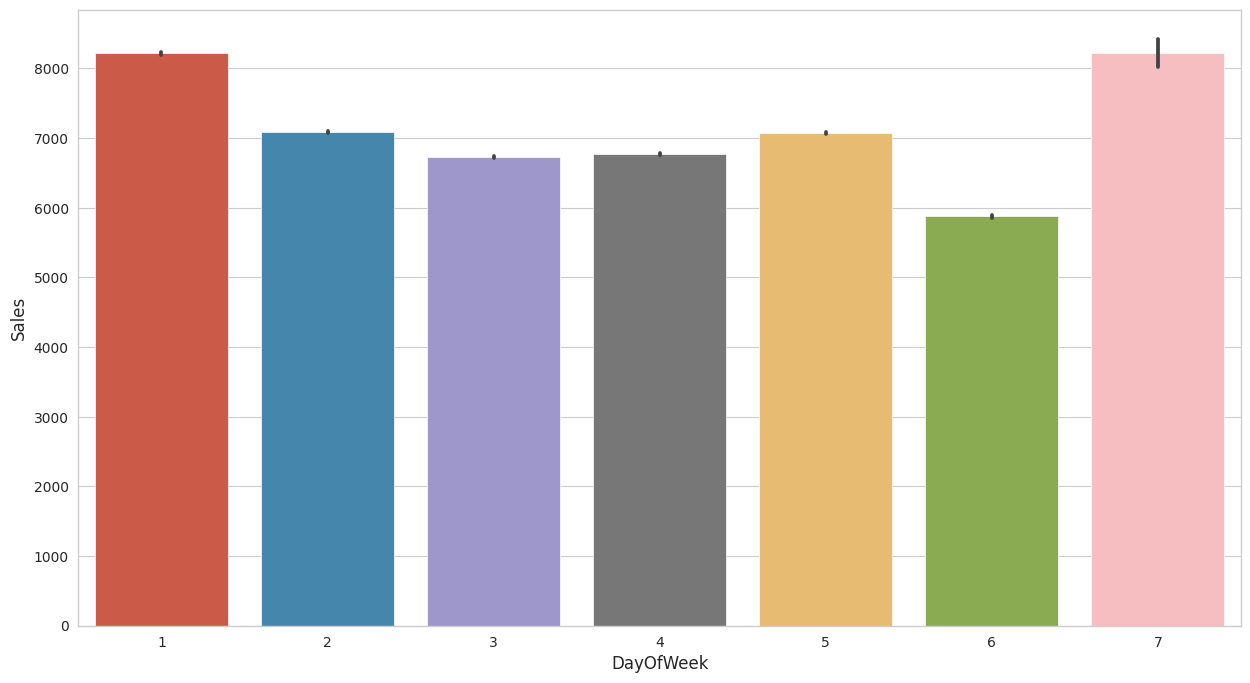

In [90]:
#plot for sales in terms of days ofthe week
plt.figure(figsize=(15,8))
sns.barplot(x='DayOfWeek', y='Sales' ,data=data);

In [110]:
data = data.drop(['PromoInterval'], axis=1)

KeyError: ignored

In [111]:
data.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'Year', 'Month', 'Day', 'WeekOfYear',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'Avg_Customer_Sales', 'StoreType_a', 'StoreType_b',
       'StoreType_c', 'StoreType_d', 'Assortment_a', 'Assortment_b',
       'Assortment_c'],
      dtype='object')

In [93]:
data.corr()

<ipython-input-93-c44ded798807>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,Store,DayOfWeek,Sales,Customers,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,...,Promo2SinceWeek,Promo2SinceYear,Avg_Customer_Sales,StoreType_a,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c
Store,1.000000,0.000343,0.007723,0.033991,-0.000015,0.002043,0.000526,0.000300,0.001371,-0.000127,...,0.010686,0.037994,-0.048409,0.005625,-0.001061,0.060835,-0.050692,-0.007802,0.021376,0.003605
DayOfWeek,0.000343,1.000000,-0.178753,-0.097266,-0.289268,-0.002699,-0.139319,0.002099,-0.019710,0.008525,...,-0.000581,0.003387,-0.094929,-0.004316,0.038016,-0.003181,-0.004077,-0.003912,0.027509,-0.001496
Sales,0.007723,-0.178753,1.000000,0.823552,0.368199,0.020106,0.038635,0.036151,0.073589,-0.051865,...,0.095212,-0.034595,0.186563,-0.010591,0.144685,-0.002891,-0.028627,-0.113710,0.053841,0.103257
Customers,0.033991,-0.097266,0.823552,1.000000,0.182859,0.049523,0.024915,-0.000842,0.053843,-0.035416,...,0.061585,0.041017,-0.323926,0.088394,0.430137,0.051685,-0.259187,-0.038868,0.322247,-0.024493
Promo,-0.000015,-0.289268,0.368199,0.182859,1.000000,-0.002418,0.028971,0.023990,-0.006412,-0.126442,...,-0.001210,-0.002185,0.280027,0.002423,-0.017843,0.002163,0.000989,0.001601,-0.012921,0.000939
StateHoliday,0.002043,-0.002699,0.020106,0.049523,-0.002418,1.000000,0.022889,0.000934,0.005277,-0.003289,...,-0.005718,0.008346,-0.033581,-0.016383,0.122330,-0.006958,-0.012843,-0.008610,0.093959,-0.009868
SchoolHoliday,0.000526,-0.139319,0.038635,0.024915,0.028971,0.022889,1.000000,-0.038686,0.118467,0.038085,...,-0.003960,-0.003451,0.013187,0.001972,-0.002988,0.002764,-0.003301,0.002973,-0.002782,-0.002429
Year,0.000300,0.002099,0.036151,-0.000842,0.023990,0.000934,-0.038686,1.000000,-0.268835,0.008387,...,-0.005553,-0.001077,0.072871,0.000508,0.003217,0.001203,-0.002376,-0.002157,0.001360,0.001892
Month,0.001371,-0.019710,0.073589,0.053843,-0.006412,0.005277,0.118467,-0.268835,1.000000,-0.006577,...,-0.026527,-0.007055,0.015371,0.004692,0.004988,0.006066,-0.011006,-0.008517,0.002143,0.008106
Day,-0.000127,0.008525,-0.051865,-0.035416,-0.126442,-0.003289,0.038085,0.008387,-0.006577,1.000000,...,0.000918,0.000528,-0.025104,0.000129,-0.001828,-0.000250,0.000578,0.000005,-0.001290,0.000249


<ipython-input-103-f99182ec8f65>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr().abs(), annot=True)


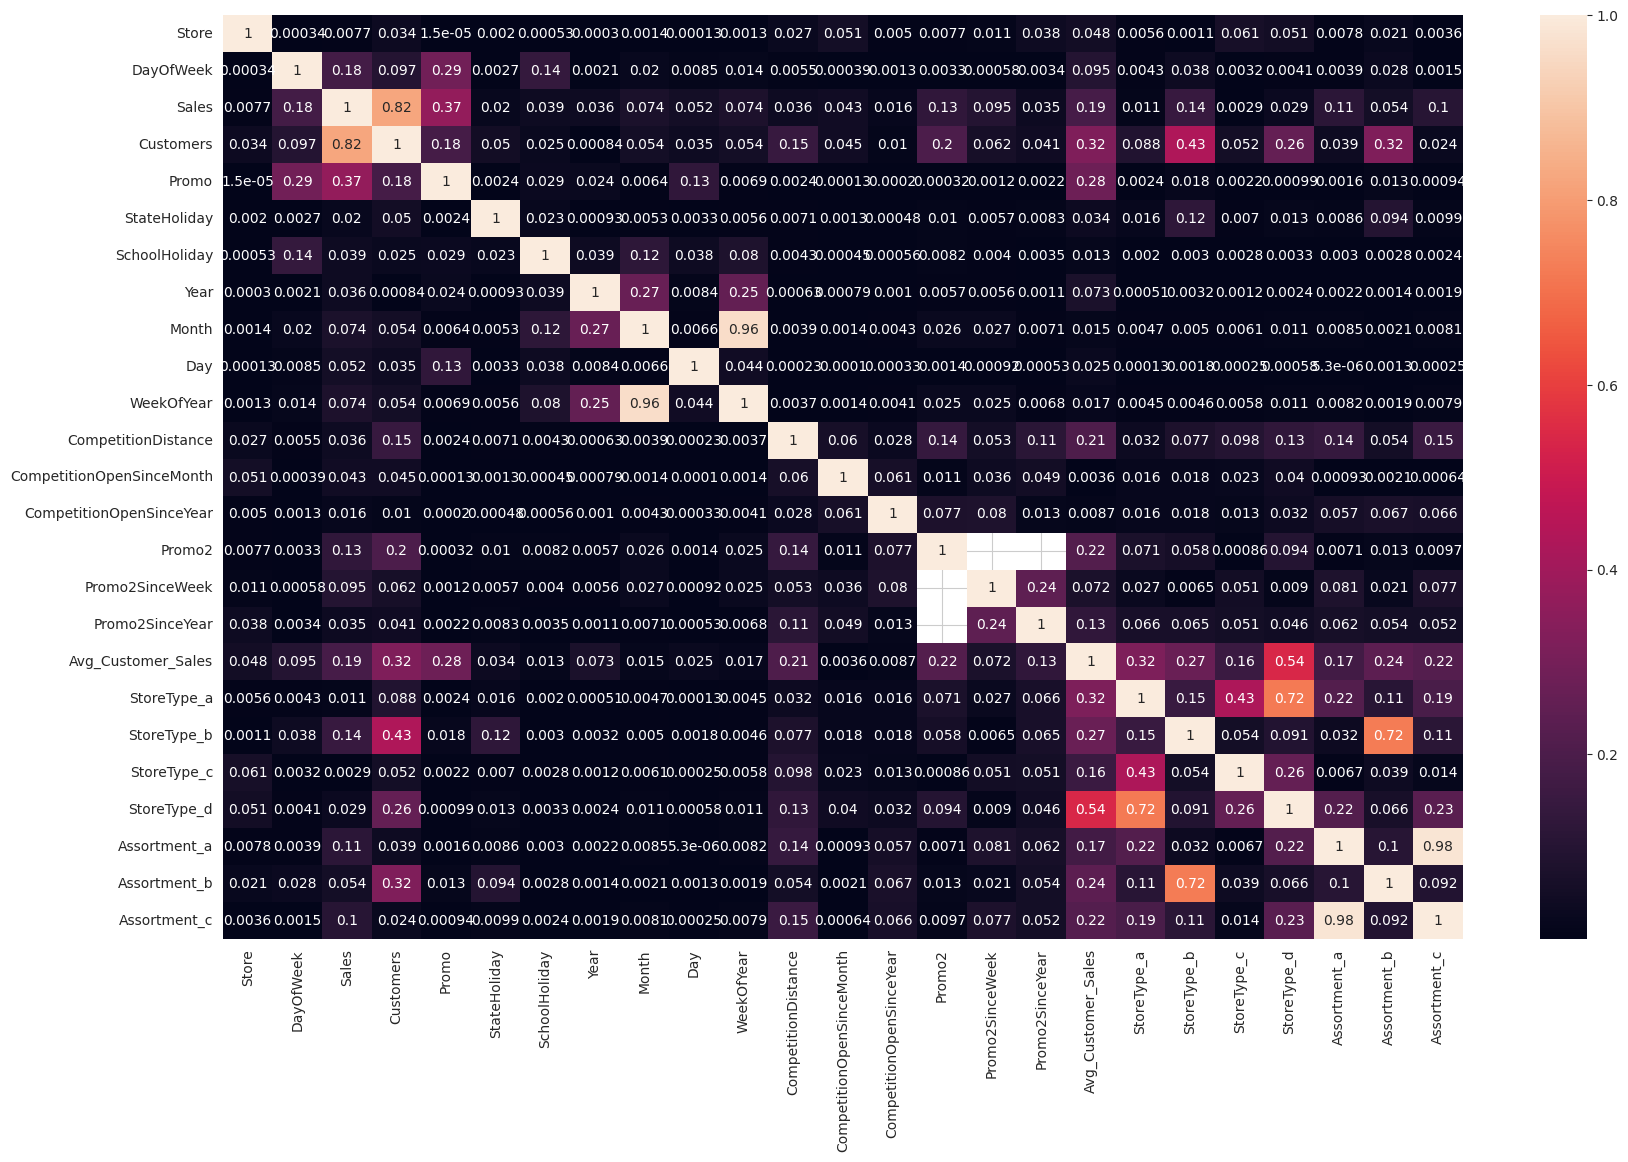

In [103]:
plt.subplots(figsize=(20,12))
sns.heatmap(data.corr().abs(), annot=True)
plt.savefig("heatmap.png")

In [118]:
data = data.dropna()

In [119]:
#Definiendo X,y
X = data.drop(['Sales','Date','Year','Store'], axis = 1)
y = data.Sales

In [120]:
# Asegurandonos que sólo hay variables numéricas
X.dtypes

DayOfWeek                      int64
Customers                      int64
Promo                          int64
StateHoliday                   int64
SchoolHoliday                  int64
Month                          int64
Day                            int64
WeekOfYear                     int64
CompetitionDistance          float64
CompetitionOpenSinceMonth    float64
CompetitionOpenSinceYear     float64
Promo2                         int64
Promo2SinceWeek              float64
Promo2SinceYear              float64
Avg_Customer_Sales           float64
StoreType_a                    uint8
StoreType_b                    uint8
StoreType_c                    uint8
StoreType_d                    uint8
Assortment_a                   uint8
Assortment_b                   uint8
Assortment_c                   uint8
dtype: object

In [121]:
#Separando Datos
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3, random_state=0)

# Elección y Evaluación de Algoritmos

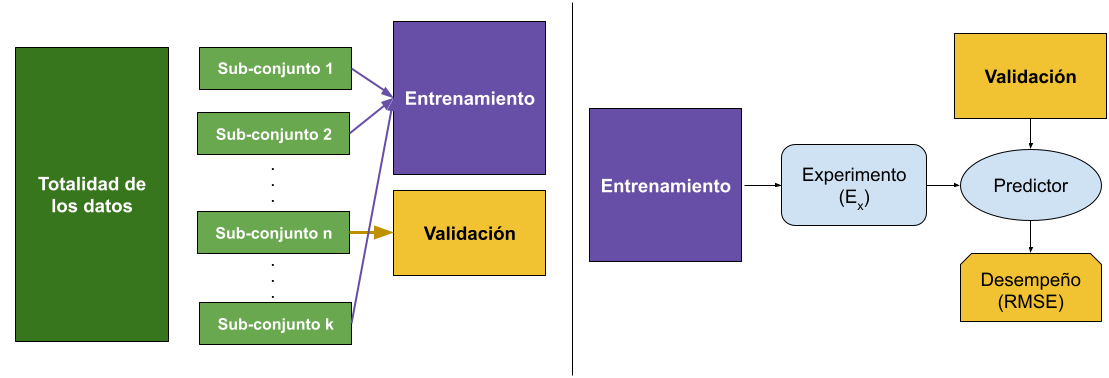

utilizaremos un DataFrame para comparar el desempeño de cada uno de los modelos utilizando el coeficiente de determinación R<sup>2</sup> con el método .score

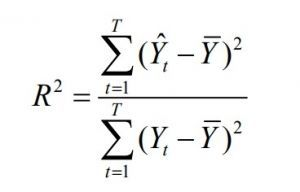

In [98]:
score_df = pd.DataFrame({'Train_Score':[train_score_1,
                                        train_score_2,
                                        train_score_3,
                                        train_score_4],
                         'Test_Score':[test_score_1,
                                       test_score_2,
                                       test_score_3,
                                       test_score_4]})

NameError: ignored

# 01. Regresión Lineal Múltiple

La Regresión Lineal Múltiple intenta modelar la relación entre dos o más características y una respuesta ajustando una ecuación lineal a los datos observados. Los pasos para realizar la Regresión Lineal Múltiple son casi similares a los de la Regresión Lineal Simple. La diferencia radica en la evaluación. Podemos usarla para descubrir qué factor tiene el mayor impacto en la salida predicha y cómo se relacionan entre sí diferentes variables.

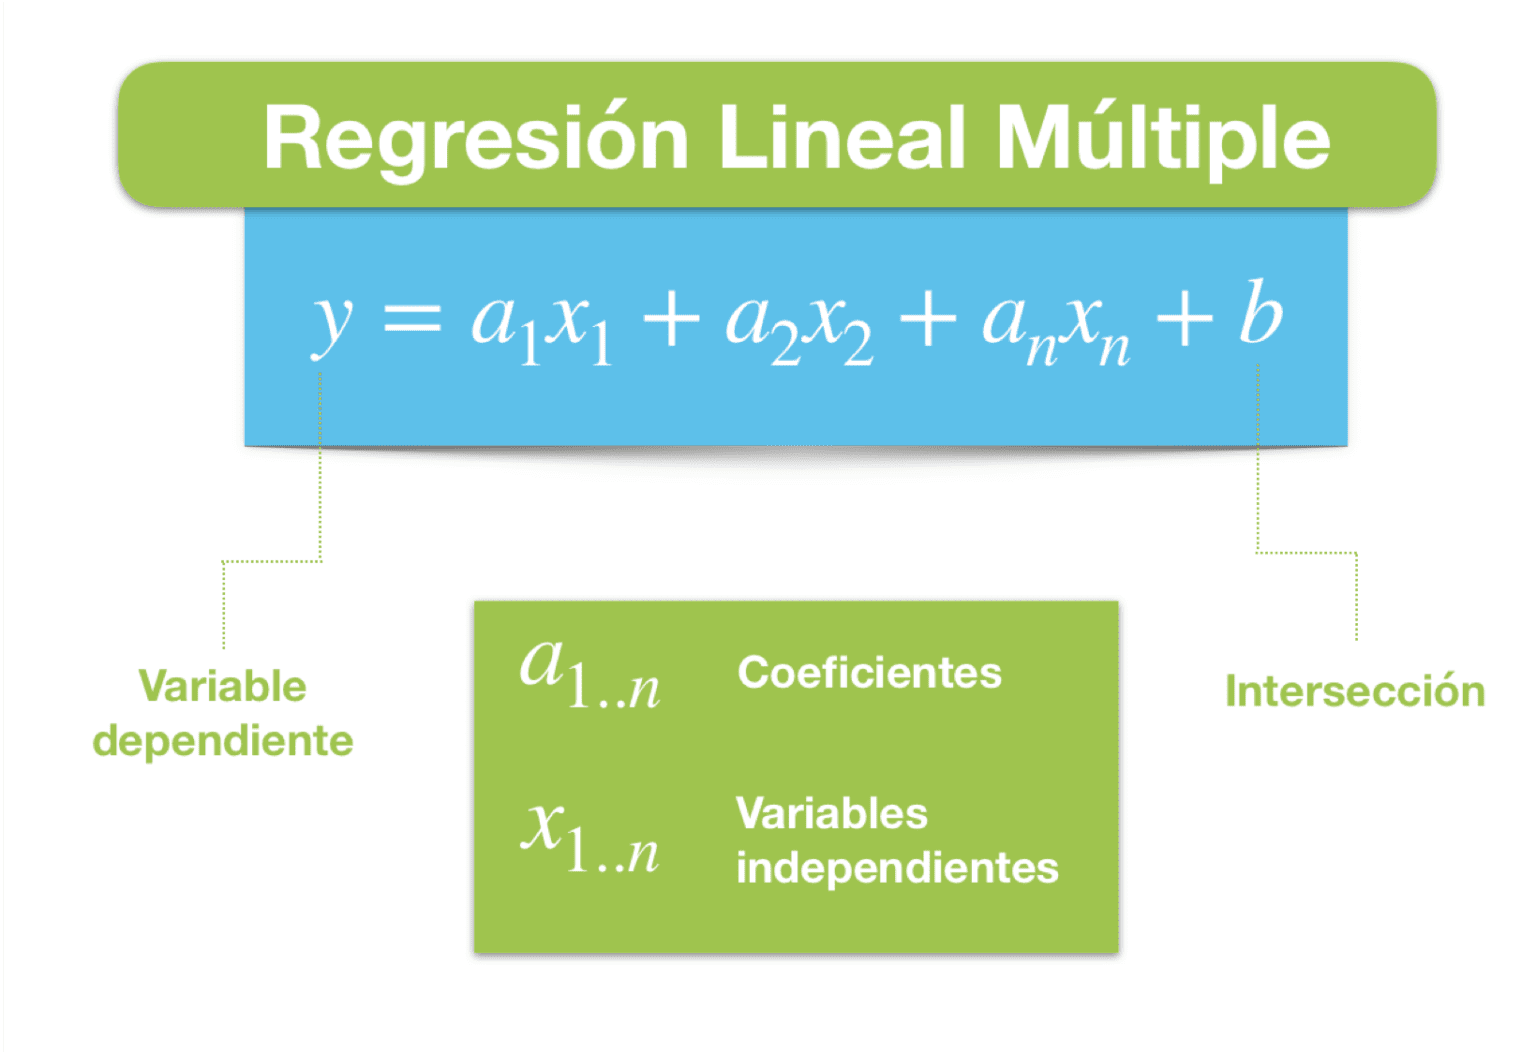

**Supuestos del modelo de regresión:**

- Linealidad: La relación entre las variables dependientes e independientes debe ser lineal.
- Homocedasticidad: Se debe mantener la varianza constante de los errores.
- Normalidad multivariante: La Regresión Múltiple asume que los residuos están distribuidos de manera normal.
- Ausencia de multicolinealidad: Se asume que hay poca o ninguna multicolinealidad en los datos.

### Implementación

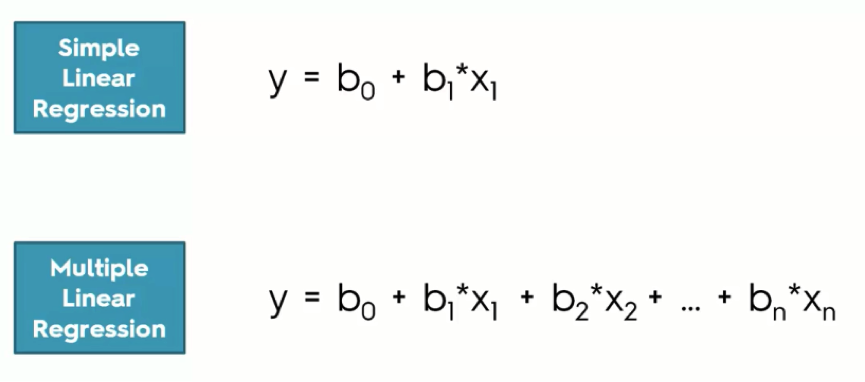

In [122]:
# Transforming data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [124]:
# Fitting Multiple Linear Regression to the Training set
regressor = LinearRegression()
regressor.fit(X_train,y_train)
print(regressor)

LinearRegression()


In [125]:
regressor.intercept_

-3582.246939590096

In [126]:
regressor.coef_

array([-8.68931954e+01,  2.86822530e+04,  1.01363314e+02,  1.41630072e+02,
        2.87455108e+00,  7.46625987e+01,  4.21344224e+01, -3.04629497e-01,
        1.80425978e+02, -1.70947273e+01, -8.23749486e+01,  9.09494702e-12,
        8.36176494e+01,  5.68911882e+01,  4.00634124e+04,  6.05038351e+01,
        0.00000000e+00,  3.15646729e+01, -9.20685081e+01, -1.52990020e+01,
        0.00000000e+00,  1.52990020e+01])

In [127]:
y_pred_train = regressor.predict(X_train)

In [128]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)

In [129]:
mean_squared_error(y_test, y_pred)

319989.9873143539

In [130]:
# Test performance
math.sqrt(mean_squared_error(y_test, y_pred))

565.6765748326104

In [131]:
train_score_1=regressor.score(X_train,y_train)
train_score_1

0.9564100083289289

In [132]:
test_score_1=regressor.score(X_test,y_test)
test_score_1

0.9564678552635476

In [133]:
#storing 100 observations for analysis
simple_lr_pred = y_pred[:100]
simple_lr_real = y_test[:100]
dataset_lr = pd.DataFrame({'Real':simple_lr_real,'PredictedLR':simple_lr_pred}) #storing these values into dataframe

In [134]:
#storing absolute diffrences between actual sales price and predicted
dataset_lr['diff']=(dataset_lr['Real']-dataset_lr['PredictedLR']).abs()

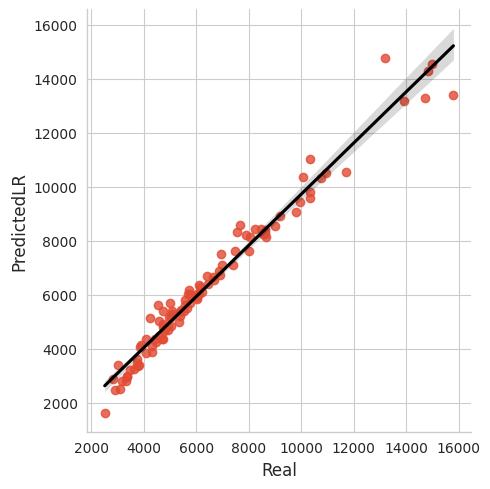

In [135]:
#visualising our predictions
sns.lmplot(x='Real', y='PredictedLR', data=dataset_lr, line_kws={'color': 'black'});

# 02. LARS Lasso Regression

### ¿Qué es La regresión Lasso?

En Estadística y Aprendizaje Automático, Lasso (least absolute shrinkage and selection operator, por sus siglas en inglés), es un método de análisis de regresión que realiza selección de variables y regularización para mejorar la exactitud e interpretabilidad del modelo estadístico producido por este.

### ¿Qué es LARS?

La **Regresión de Ángulo Mínimo (LARS, por sus siglas en inglés)**  es un algoritmo utilizado en regresión para datos de alta dimensionalidad (es decir, datos con un gran número de atributos). LARS es algo similar a la regresión paso a paso hacia adelante. Dado que se utiliza con datos que tienen muchos atributos, en cada paso, LARS encuentra el atributo que está más altamente correlacionado con el valor objetivo. Puede haber más de un atributo que tenga la misma correlación. En este escenario, LARS promedia los atributos y procede en una dirección que tiene el mismo ángulo con los atributos. Es exactamente por esto que este algoritmo se llama Regresión de Ángulo Mínimo. Básicamente, LARS da saltos en la dirección calculada de manera más óptima sin sobreajustar el modelo.

#### Algoritmo:
* Normaliza todos los valores para que tengan media cero y varianza unitaria.
* Encuentra una variable que esté más altamente correlacionada con el residuo. Mueve la línea de regresión en esta dirección hasta llegar a otra variable que tenga la misma o mayor correlación.
Nota: El residuo es la diferencia entre el valor observado y el valor predicho. Aquí, "variable" implica un atributo.
* Cuando tengamos dos variables que tengan la misma correlación, mueve la línea de regresión en un ángulo que esté entre ellas (es decir, el ángulo mínimo entre las dos variables).
* Continúa así hasta que todos nuestros datos se agoten o hasta que consideres que el modelo es lo suficientemente grande y "general".

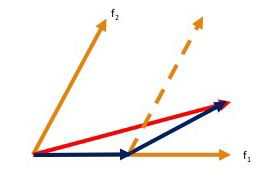

**Matemáticamente, LARS funciona de la siguiente manera:**

-Todos los coeficientes 'B' se establecen en 0.
- Se encuentra el predictor xj que está más correlacionado con y.
- Se incrementa el coeficiente Bj en la dirección que está más correlacionada con y y se detiene cuando se encuentra otro predictor xk que tiene igual o mayor correlación que xj.
- Se extiende (Bj, Bk) en una dirección que es equiangular (tiene el mismo ángulo) tanto para xj como para xk.
- Se continúa y se repite este proceso hasta que todos los predictores estén en el modelo.

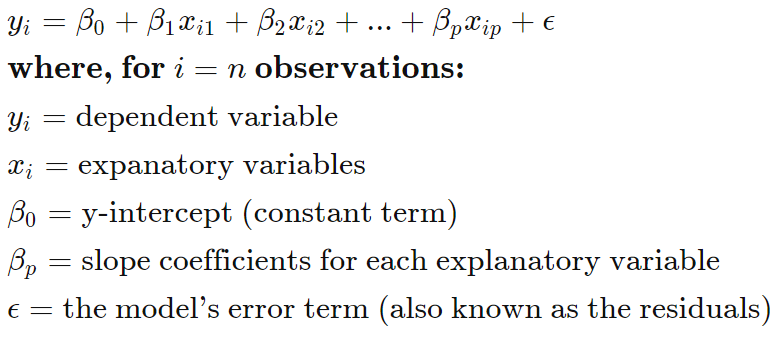

### Implementación

In [137]:
las = LassoLars(alpha=0.3, fit_intercept=False, normalize=True)
lasreg = las.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_base.py:109: FutureWarning: 'normalize' was deprecated in version 1.2 and will be removed in 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLars())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(


In [138]:
def rmse(x, y):
    return sqrt(mean_squared_error(x, y))

# definte MAPE function
def mape(x, y):
    return np.mean(np.abs((x - y) / x)) * 100

train_score_2=lasreg.score(X_train, y_train)
test_score_2=lasreg.score(X_test, y_test)

y_predicted = lasreg.predict(X_train)
y_test_predicted = lasreg.predict(X_test)


print("Regresion Model Score" , ":" , train_score_2 , "," ,
      "Out of Sample Test Score" ,":" , test_score_2)
print("Training RMSE", ":", rmse(y_train, y_predicted),
      "Testing RMSE", ":", rmse(y_test, y_test_predicted))
print("Training MAPE", ":", mape(y_train, y_predicted),
      "Testing MAPE", ":", mape(y_test, y_test_predicted))


Regresion Model Score : 0.956372454888887 , Out of Sample Test Score : 0.9563914449125861
Training RMSE : 566.5657208437822 Testing RMSE : 566.1728126740211
Training MAPE : 6.327643670637103 Testing MAPE : 6.295663947075636


# 03. Regresión de Arbol de Decisión

El **árbol de decisiones** es una herramienta de toma de decisiones que utiliza una estructura de árbol similar a un diagrama de flujo o es un modelo de decisiones y todos sus posibles resultados, incluyendo los resultados, los costos de entrada y la utilidad.
El algoritmo del árbol de decisiones se encuentra dentro de la categoría de algoritmos de aprendizaje supervisado. Funciona tanto para variables de salida continuas como categóricas.

Las ramas representan el resultado del nodo y los nodos pueden ser:

1. Condiciones [Nodos de decisión]
2. Resultado [Nodos finales]

Las ramas representan la verdad o falsedad de la declaración y toman una decisión basada en eso. El siguiente ejemplo muestra un árbol de decisiones que evalúa el número más pequeño de tres números:

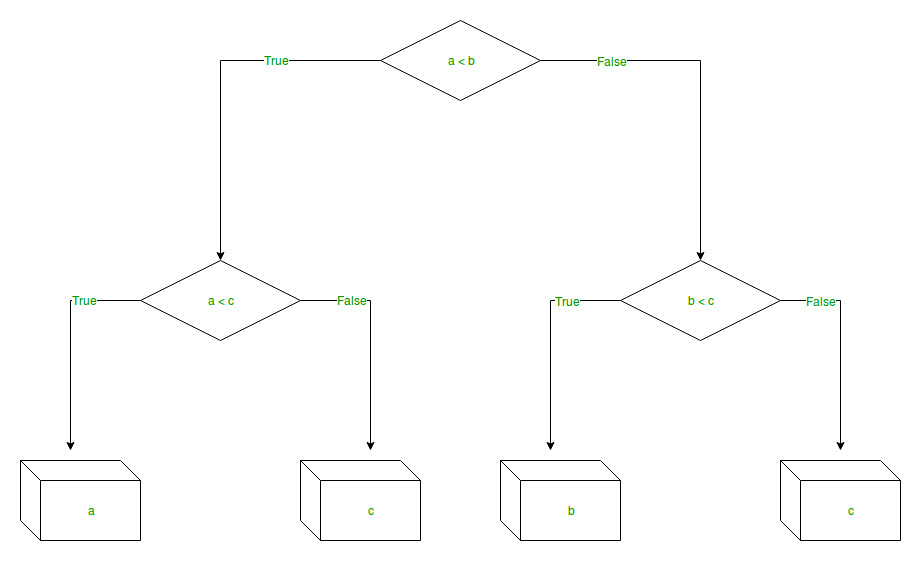


**Regresión de Árbol de Decisiones:**

La regresión de árbol de decisiones observa las características de un objeto y entrena un modelo en la estructura de un árbol para predecir datos en el futuro y producir una salida continua significativa. La salida continua significa que el resultado no es discreto, es decir, no está representado solo por un conjunto discreto y conocido de números o valores.

- Ejemplo de salida discreta: Un modelo de predicción del clima que predice si habrá lluvia o no en un día en particular.
- Ejemplo de salida continua: Un modelo de predicción de beneficios que indica el beneficio probable que se puede obtener de la venta de un producto.

Aquí, se predicen valores continuos con la ayuda de un modelo de regresión de árbol de decisiones.

### Implementación Normal

In [139]:
tree = DecisionTreeRegressor()
treereg = tree.fit(X_train, y_train)

In [140]:
train_score_3=treereg.score(X_train, y_train)
test_score_3=treereg.score(X_test, y_test)

print("Regresion Model Score" , ":" , train_score_3 , "," ,
      "Test Score" ,":" , test_score_3)

y_predicted = treereg.predict(X_train)
y_test_predicted = treereg.predict(X_test)
print("Training RMSE", ":", rmse(y_train, y_predicted),
      "Testing RMSE", ":", rmse(y_test, y_test_predicted))
print("Training MAPE", ":", mape(y_train, y_predicted),
      "Testing MAPE", ":", mape(y_test, y_test_predicted))

Regresion Model Score : 1.0 , Test Score : 0.9987096628690213
Training RMSE : 0.0 Testing RMSE : 97.39008833832206
Training MAPE : 0.0 Testing MAPE : 0.35978162883934767


# Parámetros e Hiperparámetros

### ¿Qué son los Hiperparámetros?


Los hiperparámetros son parámetros cuyos valores controlan el proceso de aprendizaje y determinan los valores de los parámetros del modelo que un algoritmo de aprendizaje termina aprendiendo. El prefijo 'hyper_' sugiere que son parámetros de "alto nivel" que controlan el proceso de aprendizaje y los parámetros del modelo resultante.

Se elige y establece los valores de hiperparámetros que su algoritmo de aprendizaje utilizará antes de que comience el entrenamiento del modelo. En este sentido, se dice que los hiperparámetros son externos al modelo porque el modelo no puede cambiar sus valores durante el aprendizaje/entrenamiento.

Los hiperparámetros son utilizados por el algoritmo de aprendizaje durante el proceso de aprendizaje, pero no forman parte del modelo resultante. Al final del proceso de aprendizaje, tenemos los parámetros del modelo entrenado, que efectivamente es a lo que nos referimos como el modelo. Los hiperparámetros que se utilizaron durante el entrenamiento no forman parte de este modelo. Por ejemplo, no podemos saber qué valores de hiperparámetros se utilizaron para entrenar un modelo solo mirando el modelo en sí, solo conocemos los parámetros del modelo que se aprendieron.

Básicamente, cualquier cosa en el aprendizaje automático y el aprendizaje profundo cuyos valores se decidan o se elija su configuración antes de que comience el entrenamiento y cuyos valores o configuración permanezcan iguales cuando termine el entrenamiento es un hiperparámetro.

Aquí hay algunos ejemplos comunes:

- Train-test split ratio
- Learning Rate: Tasa de aprendizaje en algoritmos de optimización (por ejemplo, descenso de gradiente).
- Elección del algoritmo de optimización (por ejemplo, descenso de gradiente, descenso de gradiente estocástico o optimizador Adam).
- Elección de la función de activación en una capa de una red neuronal (por ejemplo, Sigmoide, ReLU, Tanh).
- Elección de la función de costo o pérdida que utilizará el modelo.
- Número de capas ocultas en una red neuronal.
- Número de unidades de activación en cada capa.
- Tasa de dropout en una red neuronal (probabilidad de dropout).
- Número de iteraciones (épocas) en el entrenamiento de una red neuronal.
- Número de clusters en una tarea de agrupamiento.
- Tamaño del kernel o filtro en capas convolucionales.
-Tamaño de pooling.
-Tamaño del lote de datos (batch size).

## ¿Qué son los parámetros?

Por otro lado, los parámetros son internos al modelo. Es decir, se aprenden o estiman únicamente a partir de los datos durante el entrenamiento, mientras que el algoritmo utilizado intenta aprender la relación entre las características de entrada y las etiquetas o objetivos.

El entrenamiento del modelo generalmente comienza con los parámetros inicializados en ciertos valores (valores aleatorios o establecidos en cero). A medida que avanza el entrenamiento/aprendizaje, los valores iniciales se actualizan utilizando un algoritmo de optimización (por ejemplo, descenso de gradiente). El algoritmo de aprendizaje actualiza continuamente los valores de los parámetros a medida que progresa el aprendizaje, pero los valores de hiperparámetros establecidos por el diseñador del modelo permanecen sin cambios.

Al final del proceso de aprendizaje, los parámetros del modelo son los que constituyen el modelo en sí mismo.

Ejemplos de parámetros:

- Los coeficientes (o pesos) de modelos de regresión lineal y logística.
- Pesos y sesgos de una red neuronal.
- Los centroides de clusters en el agrupamiento. (Ks en algorítmos de K)

## importancia

En resumen, los parámetros en el aprendizaje automático y el aprendizaje profundo son los valores que su algoritmo de aprendizaje puede cambiar de forma independiente a medida que aprende, y estos valores son afectados por la elección de los hiperparámetros que proporciona. Por lo tanto, establece los hiperparámetros antes de que comience el entrenamiento y el algoritmo de aprendizaje los utiliza para aprender los parámetros. Detrás de escena, los parámetros se actualizan continuamente y los valores finales al final del entrenamiento constituyen su modelo.

Por lo tanto, establecer los valores correctos de los hiperparámetros es muy importante porque afecta directamente el rendimiento del modelo que resultará de su uso durante el entrenamiento del modelo. El proceso de elegir los mejores valores de hiperparámetros para su modelo se llama ajuste de hiperparámetros y en el próximo artículo exploraremos una manera sistemática de realizar el ajuste de hiperparámetros.

## 04 Arbol de Decisión con Hipeparámetros

In [141]:
tree = DecisionTreeRegressor(min_samples_leaf=8,min_samples_split=5)
treereg = tree.fit(X_train,y_train)

In [142]:
train_score_4=treereg.score(X_train, y_train)
test_score_4=treereg.score(X_test, y_test)

print("Regresion Model Score" , ":" , train_score_4 , "," ,
      "Test Score" ,":" , test_score_4)

y_predicted = treereg.predict(X_train)
y_test_predicted = treereg.predict(X_test)
print("Training RMSE", ":", rmse(y_train, y_predicted),
      "Testing RMSE", ":", rmse(y_test, y_test_predicted))
print("Training MAPE", ":", mape(y_train, y_predicted),
      "Testing MAPE", ":", mape(y_test, y_test_predicted))

Regresion Model Score : 0.9987692798454967 , Test Score : 0.9979561405064998
Training RMSE : 95.15893282516984 Testing RMSE : 122.57126850249372
Training MAPE : 0.31457209113588464 Testing MAPE : 0.43694528390166465


In [143]:
#storing 100 observations for analysis
dc_pred = y_test_predicted[:100]
dc_real = y_test[:100]
dataset_dc = pd.DataFrame({'Real':dc_real,'PredictedDC':dc_pred}) #storing these values into dataframe

In [144]:
#storing absolute diffrences between actual sales price and predicted
dataset_dc['diff']=(dataset_dc['Real']-dataset_dc['PredictedDC']).abs()

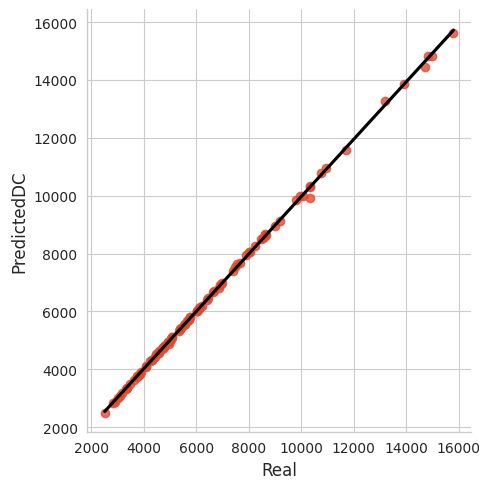

In [145]:
#visualising our predictions
sns.lmplot(x='Real', y='PredictedDC', data=dataset_dc, line_kws={'color': 'black'});

# Resultados y Conclusiones

In [146]:
score_df = pd.DataFrame({'Train_Score':[train_score_1,
                                        train_score_2,
                                        train_score_3,
                                        train_score_4],
                         'Test_Score':[test_score_1,
                                       test_score_2,
                                       test_score_3,
                                       test_score_4]})

In [147]:
score_df

,Train_Score,Test_Score
0,0.956410,0.956468
1,0.956372,0.956391
2,1.000000,0.998710
3,0.998769,0.997956
